In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csdata = pd.read_csv('../input/clickstream-data-for-online-shopping/e-shop clothing 2008.csv',
                     delimiter = ';')
print(csdata.shape)
csdata.head(3)

(165474, 14)


,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1


### **Defining Goals and Variables**

### Questions / Goals
1. When do sales peak?
2. What type of clothing sells most? What type of clothing sells most per month?
3. Does a correlation exist between price and page, and, if so, how strongly are price and product placement related?


### Predictions
1. I expect sales to peak in June, as buyers purchase clothing for vacation months / outdoor months.
2. No strong feelings / expectations of what to find
3. I believe higher priced items will be located towards the front page, in order to maximize profits.


### Chosen Variables

The columns which will be relevant for this analysis are (as defined in the uploaded data):

* MONTH -> from April (4) to August (8)

* DAY -> day number of the month

* PAGE 1 (MAIN CATEGORY) -> concerns the main product category:
    *     1-trousers
    *     2-skirts
    *     3-blouses
    *     4-sale


* PRICE -> price in US dollars

* PAGE -> page number within the e-store website (from 1 to 5)

In [3]:
### New dataframe relevant columns
csdf = csdata[['month', 'day', 'page 1 (main category)', 'price', 'page']]
csdf = csdf.rename(columns={'month':'Month', 'day':'Day', 'page 1 (main category)':'Type',
                     'price':'Price', 'page':'Page'})
csdf.Type = csdf.Type.replace({1: 'Trousers', 2: 'Skirts', 3: 'Blouses', 4: 'Sale'})
csdf.Month = csdf.Month.replace({4: 'April', 5: 'May', 6: 'June', 7:'July', 8: 'August'})
csdf.head()

,Month,Day,Type,Price,Page
0,April,1,Trousers,28,1
1,April,1,Trousers,33,1
2,April,1,Skirts,52,1
3,April,1,Skirts,38,1
4,April,1,Skirts,52,1


### **Data Exploration**

### Sales by Month

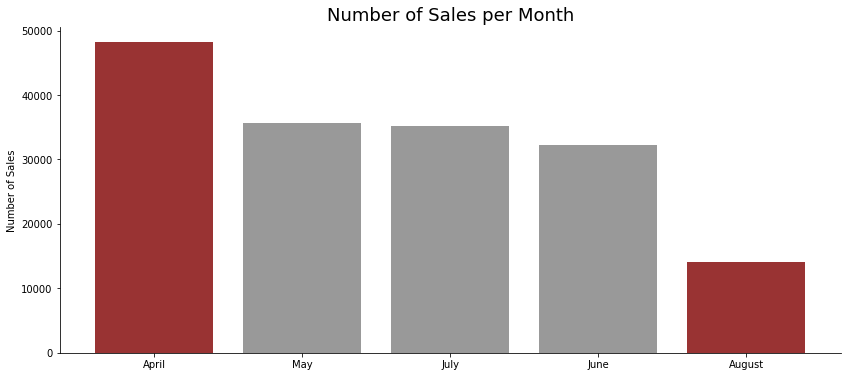

In [4]:
### Number of goods sold each month
csmsm = csdf.Month.value_counts()

fig , ax = plt.subplots(figsize = [14,6])

ax.bar(csmsm.keys(), csmsm.values, color=['maroon','gray','gray','gray','maroon'], alpha=.8)

ax.set_title('Number of Sales per Month', fontsize = 18)
ax.set_ylabel('Number of Sales')
ax.spines[['right', 'top']].set_visible(False)

plt.show()

April has the highest number of sales, and August has the fewest; August, however, seems surprisingly low - could we have incomplete data for that month? Ultimately, it is probably worth checking each month, just to ensure a full range of dates, and to see the sales trends as they unfold throughout the month.

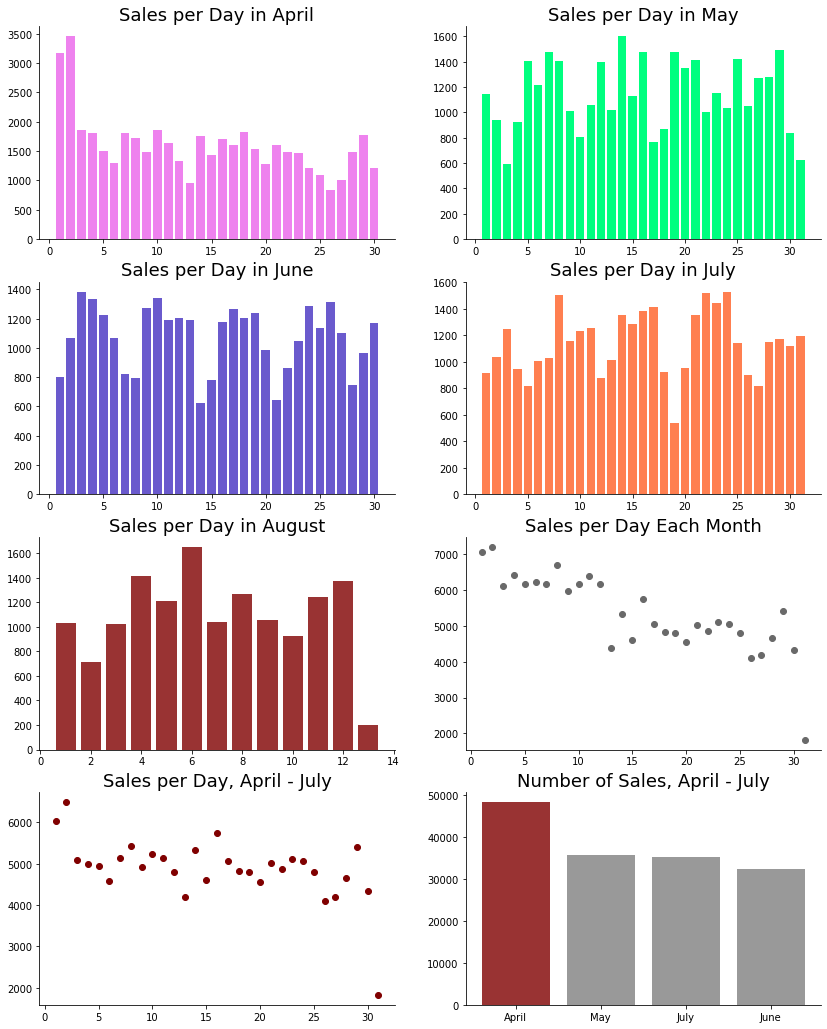

In [5]:
### Dataframes for each month
csau = csdf.loc[csdf['Month'] == 'August']
csjn =csdf.loc[csdf['Month'] == 'June']
csjl = csdf.loc[csdf['Month'] == 'July']
csmy = csdf.loc[csdf['Month'] == 'May']
csap = csdf.loc[csdf['Month'] == 'April']

fig, axs = plt.subplots(nrows=4, ncols = 2, figsize=[14,18])

axs[0,0].bar(csap.Day.value_counts().keys(), csap.Day.value_counts().values, color='violet')
axs[0,0].set_title('Sales per Day in April', fontsize=18)
axs[0,0].spines[['right', 'top']].set_visible(False)

axs[0,1].bar(csmy.Day.value_counts().keys(), csmy.Day.value_counts().values, color='springgreen')
axs[0,1].set_title('Sales per Day in May', fontsize=18)
axs[0,1].spines[['right', 'top']].set_visible(False)

axs[1,0].bar(csjn.Day.value_counts().keys(), csjn.Day.value_counts().values, color='slateblue')
axs[1,0].set_title('Sales per Day in June', fontsize=18)
axs[1,0].spines[['right', 'top']].set_visible(False)


axs[1,1].bar(csjl.Day.value_counts().keys(), csjl.Day.value_counts().values, color='coral')
axs[1,1].set_title('Sales per Day in July', fontsize=18)
axs[1,1].spines[['right', 'top']].set_visible(False)


axs[2,0].bar(csau.Day.value_counts().keys(), csau.Day.value_counts().values, color='maroon', alpha=.8)
axs[2,0].set_title('Sales per Day in August', fontsize=18)
axs[2,0].spines[['right', 'top']].set_visible(False)


axs[2,1].scatter(csdf.Day.value_counts().keys(), csdf.Day.value_counts().values, color='dimgray')
axs[2,1].set_title('Sales per Day Each Month', fontsize = 18)
axs[2,1].spines[['right', 'top']].set_visible(False)

csna = csdf.loc[csdf['Month'] != 'August']
csnac = csna.Month.value_counts()

axs[3,0].scatter(csna.Day.value_counts().keys(), csna.Day.value_counts().values, color='maroon')
axs[3,0].set_title('Sales per Day, April - July', fontsize = 18)
axs[3,0].spines[['right', 'top']].set_visible(False)

axs[3,1].bar(csnac.keys(), csnac.values, color=['maroon','gray','gray','gray'], alpha=.8)
axs[3,1].set_title('Number of Sales, April - July', fontsize = 18)
axs[3,1].spines[['right', 'top']].set_visible(False)

plt.show()

So, it looks like August is incomplete - only about half of the month has data accounted for. April may have either confounding data or incomplete data, as the first two days have so many more sales than any of the other days - maybe cumulative data from March leaked into April?


Interestingly, as for the overall data, it seems that sales peak towards the start of the month, and dwindle as the month goes on - however, the only month that follows that trend exactly is April, whereas the rest of the months seem to be relatively steady throughout. 

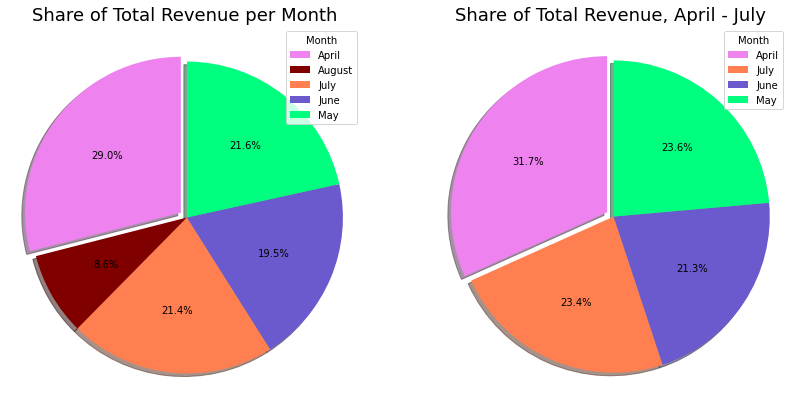

In [6]:
csmp = csdf[['Month', 'Price']]
csmpna = csna[['Month', 'Price']]
csmp2 = csmp.groupby('Month').sum()
csmpna2 = csmpna.groupby('Month').sum()

l1 = csmp2.index
l2 = csmpna2.index

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[14,7])
ax[0].pie(csmp2.Price, explode=(0.05, 0, 0, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['violet', 'maroon', 'coral', 'slateblue', 'springgreen'])
ax[0].axis('equal')
ax[0].set_title("Share of Total Revenue per Month", fontsize=18)
ax[0].legend(l1, title="Month", loc="upper right")

ax[1].pie(csmpna2.Price, explode=(0.05, 0, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['violet', 'coral', 'slateblue', 'springgreen'])
ax[1].axis('equal')
ax[1].set_title("Share of Total Revenue, April - July", fontsize=18)
ax[1].legend(l2, title="Month", loc="upper right")

plt.show()

Of all months in the data set, April has the highest revenue, and August has the lowest. If August is removed, in order to control for an incomplete month of data, June becomes the lowest selling month - the exact opposite of what I had predicted / expected to find in the data. 

Why might April be the highest sales month? Could it be tax returns (in the US)? Prepping for Spring Break, or Summer Break (maybe the vacation preparation starts earlier for most people than procrastinators, like myself)? Could it be replacing wardrobes after a long winter and spring cleaning?

### Sales by Clothing Type

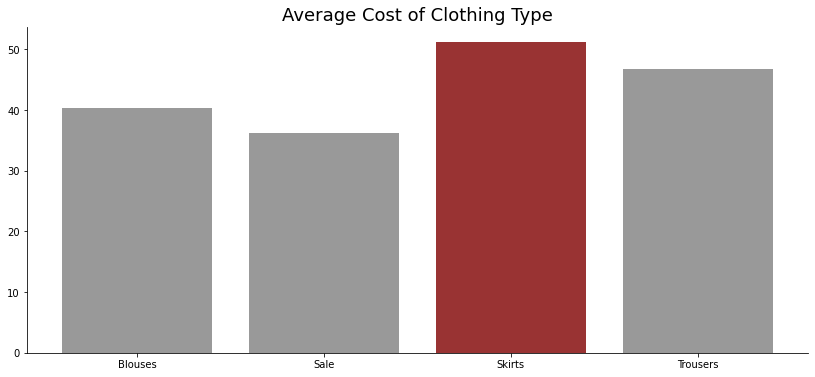

In [7]:
### Number of types of clothing sold
csctc = csdf.Type.value_counts()
### Monetary amount sold per type of clothing
csctr = csdf[['Type', 'Price']]
cscts = csctr.groupby('Type').sum()
cscta = csctr.groupby('Type').mean()

csct = cscts
csct['Total'] = csctc
csct['Average'] = cscta['Price']
csct = csct.rename(columns={'Price' : 'Value'})

fig, ax = plt.subplots(figsize = [14,6])

ax.bar(csct.index, csct.Average, color = ['gray', 'gray', 'maroon', 'gray'], alpha = .8)
ax.set_title('Average Cost of Clothing Type', fontsize=18)
ax.spines[['right', 'top']].set_visible(False)

plt.show()

Skirts, on average, have the highest cost, whereas items on sale, intuitively, have the lowest price. How many of each item sell, and what type of monetary value do they generate?

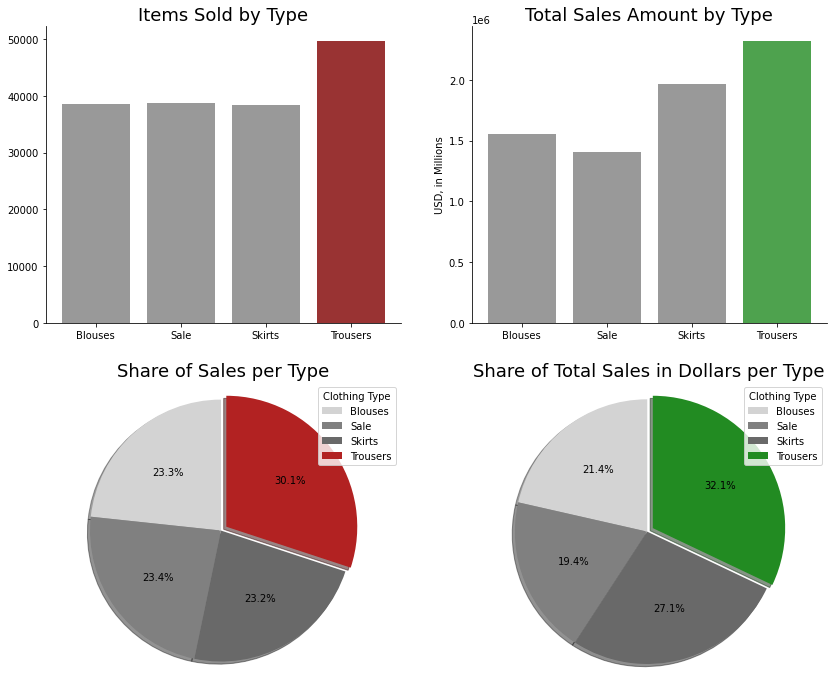

In [8]:
fig, axs = plt.subplots(nrows=2, ncols = 2, figsize=[14, 12])

axs[0,0].bar(csct.index, csct.Total, 
           color=['gray', 'gray', 'gray', 'maroon'], alpha=.8)
axs[0,0].set_title('Items Sold by Type', fontsize=18)
axs[0,0].spines[['right', 'top']].set_visible(False)

axs[0,1].bar(csct.index, csct.Value,
           color=['gray', 'gray', 'gray', 'forestgreen'], alpha=.8)
axs[0,1].set_title('Total Sales Amount by Type', fontsize=18)
axs[0,1].set_ylabel('USD, in Millions')
axs[0,1].spines[['right', 'top']].set_visible(False)
    
axs[1,0].pie(csct.Total, explode=(0, 0, 0, 0.05), autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=['lightgray', 'gray', 'dimgray', 'firebrick'])
axs[1,0].axis('equal')
axs[1,0].set_title("Share of Sales per Type", fontsize=18)
axs[1,0].legend(csct.index, title="Clothing Type", loc="upper right")

axs[1,1].pie(csct.Value, explode=(0, 0, 0, 0.05), autopct='%1.1f%%',
        shadow=True, startangle=90, 
        colors=['lightgray', 'gray', 'dimgray', 'forestgreen'])
axs[1,1].axis('equal')
axs[1,1].set_title("Share of Total Sales in Dollars per Type", fontsize=18)
axs[1,1].legend(csct.index, title="Clothing Type", loc="upper right")

plt.show()

Although skirts have the highest price, they are the least sold item, although not by a large margin. In terms of the amount of dollars generated by sales, skirts bring in the second highest numbers. 

Trousers both sell the highest number of pieces and hold the highest position in terms of dollars generated, with a significantly greater number of sales and dollars seperating trousers from the next closest items.

Items on sale sell slightly more than blouses or skirts, but, due to the lower average price, generate the fewest dollars in sales.

### Price vs. Page

In [9]:
csdf.corr()

,Day,Price,Page
Day,1.000000,-0.002818,0.011125
Price,-0.002818,1.000000,-0.150455
Page,0.011125,-0.150455,1.000000


The basic correlation does show a slightly negative relation between price and page - that is, the further back an item goes, the lower its price tends to be. Page 5 may not have as many items as pages 1 - 4, but that shouldn't have any real effect on price (it may have an effect on overall sales, though).

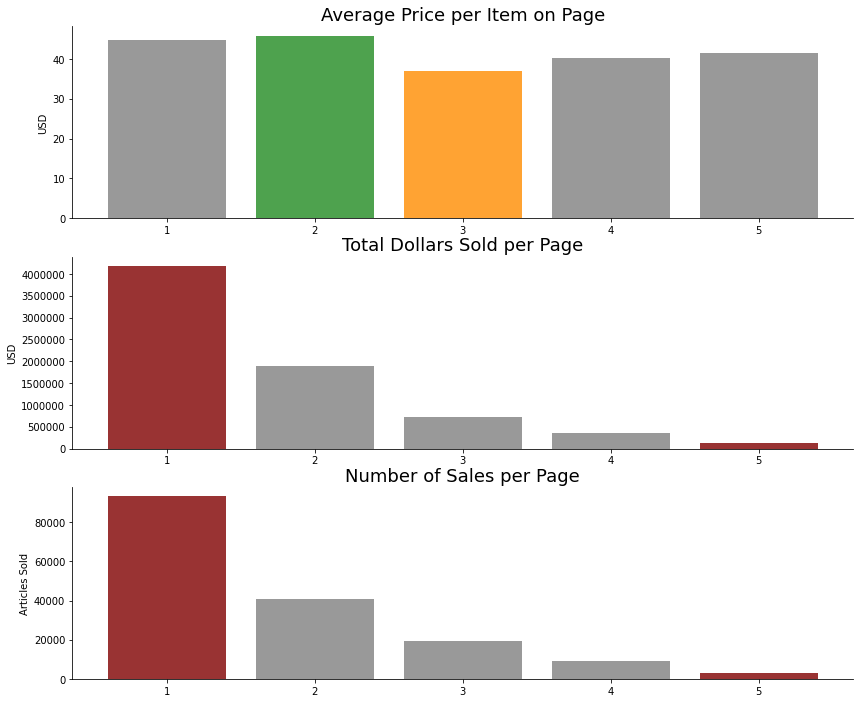

In [10]:
cspp = csdf[['Price', 'Page']]

ppavg = cspp.groupby('Page').mean()
pptot = cspp.groupby('Page').sum()
ppcnt = cspp.Page.value_counts()

ppdf = ppavg
ppdf['Total'] = pptot.Price
ppdf['Count'] = ppcnt
ppdf = ppdf.rename(columns={'Price':'Average'})

fig, axs = plt.subplots(nrows=3, ncols = 1, figsize=[14, 12])

axs[0].bar(ppdf.index, ppdf.Average, 
           color=['gray', 'forestgreen', 'darkorange', 'gray', 'gray'], alpha=.8)
axs[0].set_title('Average Price per Item on Page', fontsize=18)
axs[0].set_ylabel('USD')

axs[1].bar(ppdf.index, ppdf.Total, 
           color=['maroon', 'gray', 'gray', 'gray', 'maroon'], alpha=.8)
axs[1].set_title('Total Dollars Sold per Page', fontsize=18)
axs[1].set_ylabel('USD') 
axs[1].ticklabel_format(useOffset=False, style='plain')

axs[2].bar(ppdf.index, ppdf.Count, 
           color=['maroon', 'gray', 'gray', 'gray', 'maroon'], alpha=.8)
axs[2].set_title('Number of Sales per Page', fontsize=18)
axs[2].set_ylabel('Articles Sold')

for ax in axs:
    ax.yaxis.grid(False)
    ax.spines[['right', 'top']].set_visible(False)

plt.show()

Interestingly, pages 5 is the median page in terms of the average price of an item, with pages 1 and 2 having a higher average price per item, and pages 3 and 4 having a lower average price per item. Oddly, page 2, rather than page 1, has the highest average price per item, whereas page 3 has the lowest average price per item. Was this intentional? 

*     Is this meant to incentivize shoppers to buy on page 1, because page 2 is a little more expensive? 
*     Should they jump on the bargains of page 3, before the prices go back up or they lose interest? 

Or, perhaps product placement is a little more arbitrary. 

The revenue generated by page and the total number of sales by page seem to have a similar distribution - let's look a little closer...

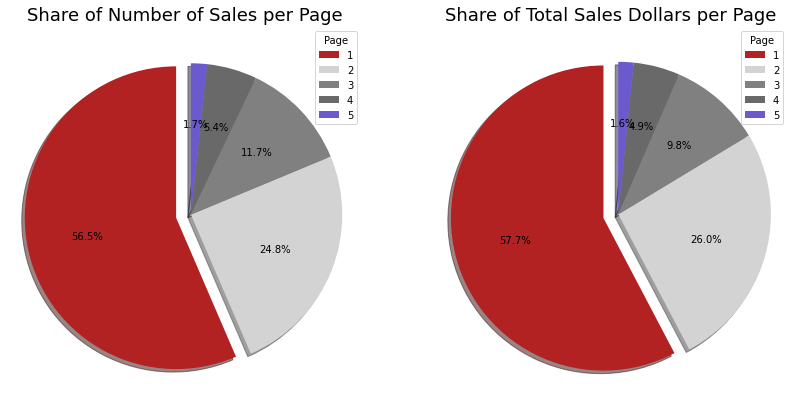

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[14,7])
ax[0].pie(ppdf.Count, explode=(0.1, 0, 0, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90, 
        colors=['firebrick', 'lightgray', 'gray', 'dimgray', 'slateblue'])
ax[0].axis('equal')
ax[0].set_title("Share of Number of Sales per Page", fontsize=18)
ax[0].legend(ppdf.index, title="Page", loc="upper right")

ax[1].pie(ppdf.Total, explode=(0.1, 0, 0, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90, 
        colors=['firebrick', 'lightgray', 'gray', 'dimgray', 'slateblue'])
ax[1].axis('equal')
ax[1].set_title("Share of Total Sales Dollars per Page", fontsize=18)
ax[1].legend(ppdf.index, title="Page", loc="upper right")

plt.show()

Both the revenue and sales generated per page skew heavily towards page 1, with well over half of all sales coming from the first page, and over 80% of each coming from pages 1 and 2. Two factors that may contribute to this are:

* Customers see an item they like, and decide to purchase it rather than continue looking.
* The more popular an item is, the closer it moves to page 1, in order to maximize sales.


### **Conclusions**

### Data Findings

The data has several important findings:

* Sales peak in April, and decline slightly in following months; the data for August is incomplete, but the decline is present with and without the August data included.

* Overall, sales peak at the beginning of the month, and decline slightly over the course of the month. Once incomplete data and possible confounders are adjusted for, the sales trend seems to be more stable over the course of a month.

* Skirts have the highest average price of all goods, but trousers sell the highest number of units and generate the most dollars in sales by a significant margin. Sales items bring in the least money, but generate more sales than either blouses or skirts.

* Pages one and two have the highest priced items, and account for over 80% of all sales and dollars. Page 5 accounts for the fewest sales, but it is unknown if it has as many items shown as pages 1-4. Page 3 has the least expensive items of all pages.